# 데이터 시각화 I 실습

막대그래프, 선그래프, 히스토그램, 파이차트, 산점도, 박스플롯을 구현해봅니다.

실습에 사용하는 데이터는 https://www.kaggle.com/datasets/nikhil7280/weather-type-classification 데이터입니다.

본인이 원하는 다른 데이터가 있다면 다른 데이터를 사용하셔도 좋습니다.

데이터에서 적절한 데이터를 선정하여 각 시각화 분석에 적용합니다.

시각화를 진행할 때는 차트 뿐만 아니라 범례, 제목, 레이블, 색상, 크기 등 여러가지 요소들을 직접 개발하시면서

데이터의 특성을 잘 이해해보시면 좋을 것 같습니다.

In [21]:
# 기본 라이브러리
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [22]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] =False

In [23]:
# 데이터 불러오기
df = pd.read_csv('weather_classification_data.csv')

#데이터의 처음 몇 줄 가져오기
print(f"데이터의 처음 몇 줄 보기:\n {df.head()}")

#데이터의 타입 보기
print(f"데이터의 타입 보기:\n {df.dtypes}")

데이터의 처음 몇 줄 보기:
    Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy  
데이터

In [24]:
# 범주형 및 수치형 데이터 분리하여 분석
categorical_cols = df.select_dtypes(include = ['object','category']).columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

print('#'*10)
print('범주형 데이터 분리하여 분석')
print('/nCategorical Columns:\n', categorical_cols)

print('#'*10)
print('수치형 데이터 분리하여 분석')
print('\nNumerical Columns:\n', numerical_cols)

##########
범주형 데이터 분리하여 분석
/nCategorical Columns:
 Index(['Cloud Cover', 'Season', 'Location', 'Weather Type'], dtype='object')
##########
수치형 데이터 분리하여 분석

Numerical Columns:
 Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')


In [25]:
# 피어슨 상관 계수
print("Pearson Correlation:\n", df[numerical_cols].corr(method='pearson'))

Pearson Correlation:
                       Temperature  Humidity  Wind Speed  Precipitation (%)  \
Temperature              1.000000 -0.207969   -0.070022          -0.287206   
Humidity                -0.207969  1.000000    0.406079           0.638631   
Wind Speed              -0.070022  0.406079    1.000000           0.443770   
Precipitation (%)       -0.287206  0.638631    0.443770           1.000000   
Atmospheric Pressure     0.209188 -0.120653   -0.077757          -0.177444   
UV Index                 0.374773 -0.342694   -0.068147          -0.291601   
Visibility (km)          0.250751 -0.479969   -0.311828          -0.457444   

                      Atmospheric Pressure  UV Index  Visibility (km)  
Temperature                       0.209188  0.374773         0.250751  
Humidity                         -0.120653 -0.342694        -0.479969  
Wind Speed                       -0.077757 -0.068147        -0.311828  
Precipitation (%)                -0.177444 -0.291601        -0.45

### 1. 막대 그래프
    ####    날씨에 따른 강수량 변화    ####
    막대 그래프는 '범주형 데이터의 빈도나 값'을 나타내기 위해 사용되는 기본적인 시각화 도구
    데이터 값은 수평 또는 수직 막대로 표현되며, 각 막대의 길이는 해당 범주의 크기나 빈도를 나타냄


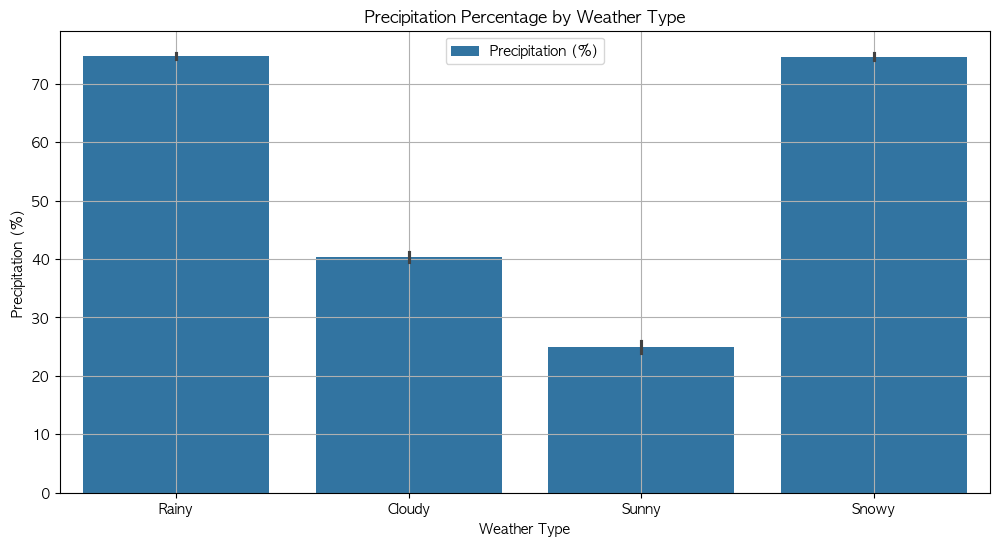

In [26]:
# 1. 막대그래프
# 막대 그래프 생성
# 막대 그래프 생성
plt.figure(figsize=(12, 6))
sns.barplot(x='Weather Type', y='Precipitation (%)', data=df, label='Precipitation (%)')
plt.title('Precipitation Percentage by Weather Type')
plt.xlabel('Weather Type')
plt.ylabel('Precipitation (%)')
plt.legend()
plt.grid(True)
plt.show()



### 2. 선그래프
    ####    계절에 따른 평균 온도    ####
    선 그래프는 시간에 따른 데이터 변화를 시각화하는 데 사용
    데이터 포인트가 선으로 연결되어 시간 경과에 따른 추세를 나타냄

/var/folders/yn/g97n5dd122qdr_rss5p0p4_40000gn/T/ipykernel_19377/2919285192.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_avg_temp = df.groupby('Season')['Temperature'].mean().reset_index()


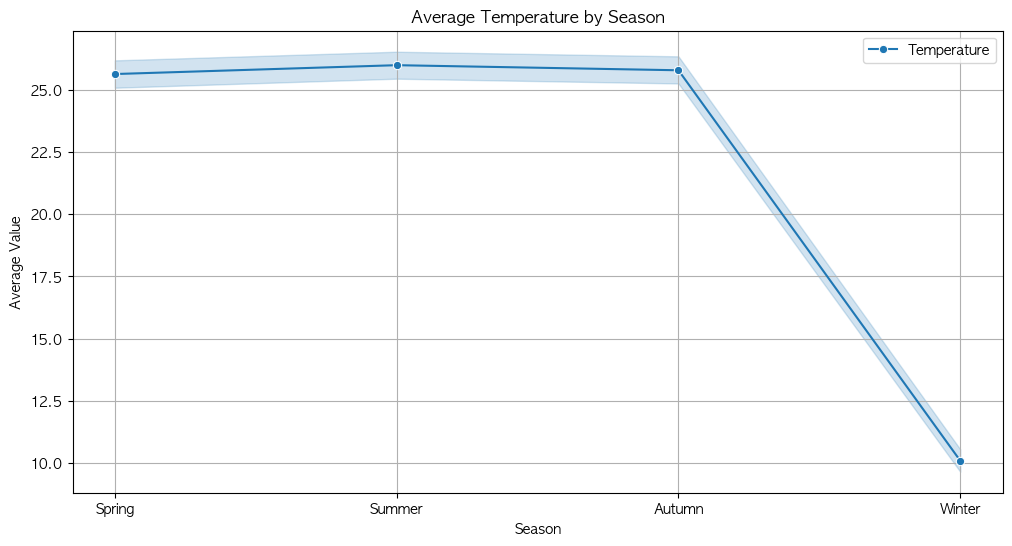

In [28]:
# 2. 선그래프
# 선그래프 생성
# 선 그래프 생성
# 'Season' 열을 범주형 데이터로 설정하고 순서 지정
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
df['Season'] = pd.Categorical(df['Season'], categories=season_order, ordered=True)

# 계절별 평균 온도 계산
seasonal_avg_temp = df.groupby('Season')['Temperature'].mean().reset_index()



plt.figure(figsize=(12, 6))
sns.lineplot(x='Season', y='Temperature', data=df, marker='o', label='Temperature')
plt.title('Average Temperature by Season')
plt.xlabel('Season')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

### 3. 히스토그램
    ####    습도 분포    ####
    히스토그램은 '연속형 데이터의 분포'를 나타내는 데 사용
    데이터 범위를 여러 구간(bin)으로 나누고 각 구간의 데이터 빈도를 막대로 표시

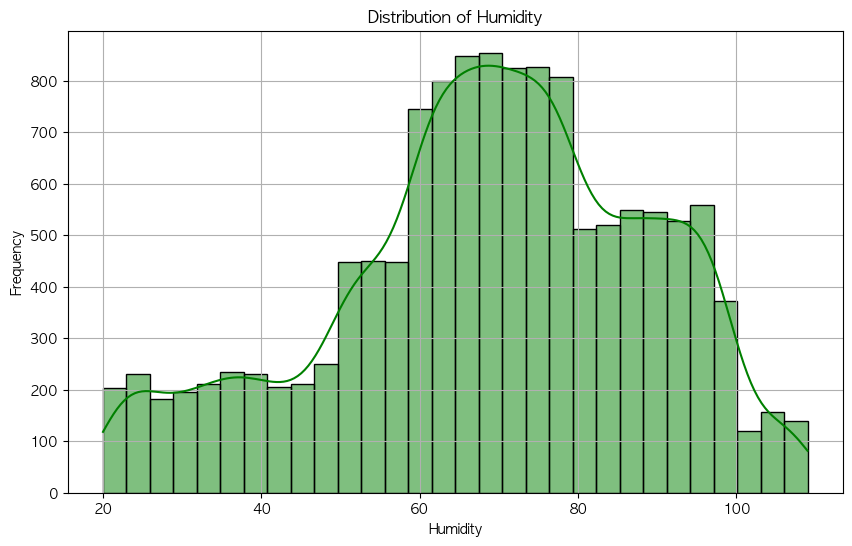

In [11]:
# 3. 히스토그램(습도 거리 분포)
# 히스토그램 생성
plt.figure(figsize=(10, 6))
sns.histplot(df['Humidity'], bins=30, color = 'green',kde=True)
plt.title('Distribution of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### 4. 파이차트
    ####    계절별 데이터 비율 계산    ####
    - 파이 차트는 전체에서 각 부분의 비율을 시각화하는 데 사용
    - 원형 차트로, 각 조각의 크기는 전체에서 해당 항목이 비율을 나타냄

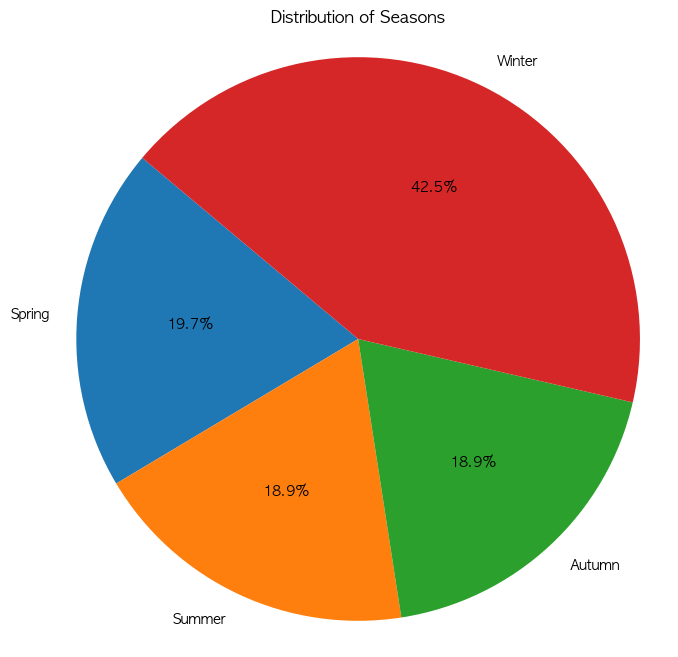

In [31]:
# 4. 파이차트
# 계절별 데이터 비율 계산
# 'Season' 열을 범주형 데이터로 설정하고 순서 지정
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
df['Season'] = pd.Categorical(df['Season'], categories=season_order, ordered=True)


season_counts = df['Season'].value_counts().sort_index()

# 파이차트 생성
plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Seasons')
plt.axis('equal')
plt.show()

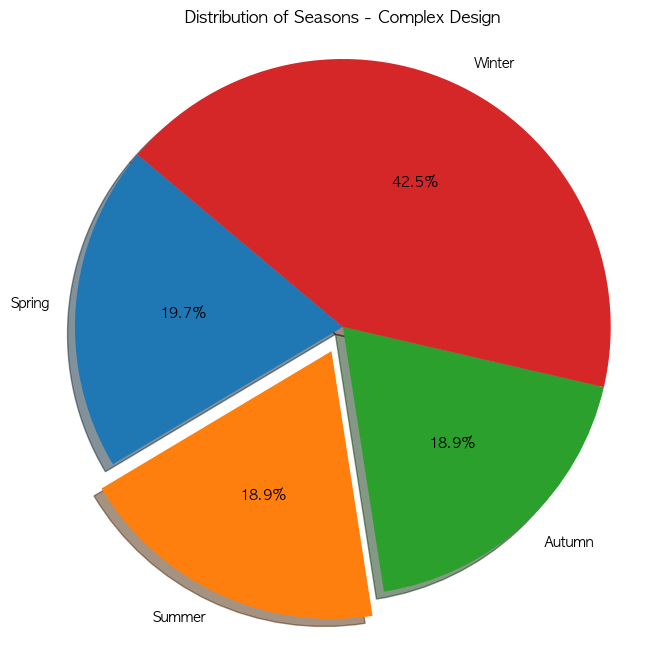

In [32]:
explode = (0, 0.1, 0, 0)  # 첫 번째 조각을 약간 떨어뜨리기

#복잡한 디자인의 파이차트
plt.figure(figsize=(8, 8))
plt.pie(season_counts, explode=explode,labels=season_counts.index, autopct='%1.1f%%',shadow=True, startangle=140)
plt.title('Distribution of Seasons - Complex Design')
plt.axis('equal')
plt.show()

### 5. 산점도
    ####    습도와 강수량의 상관관계 분석    ####
    산점도는 두 변수 간의 관계를 시각화하는 데 사용
    각 데이터 포인트는 두 변수 값의 교차점에 위치

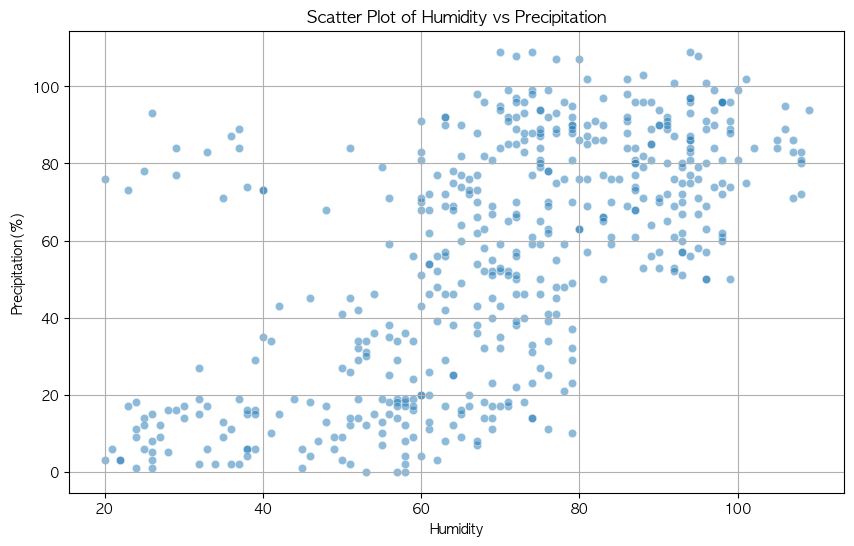

In [33]:
# 5. 산점도
# 데이터프레임 생성 (샘플링)
df_sampled = df.sample(n=500, random_state=42)


# 산점도 생성
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Humidity', y='Precipitation (%)', data=df_sampled, alpha=0.5)

# 그래프 설정
plt.title('Scatter Plot of Humidity vs Precipitation')
plt.xlabel('Humidity')
plt.ylabel('Precipitation(%)')
plt.grid(True)
plt.show()

### 6. 박스플롯
    ####    지역에따른 기압 분포 이상치 분석    ####
    박스플롯은 데이터의 분포와 이상치를 시각화 하는데 사용
    중앙값, 사분위수, 최소값, 최대값 및 이상치를 표시

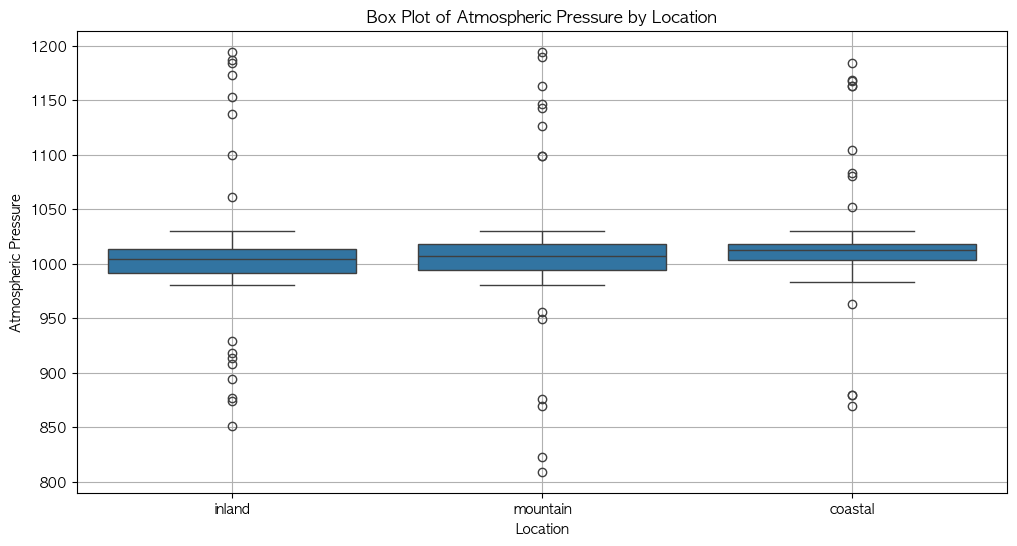

In [34]:
# 6. 박스플롯
plt.figure(figsize=(12, 6))  # 그래프 크기 설정
sns.boxplot(x='Location', y='Atmospheric Pressure', data=df_sampled)
plt.title('Box Plot of Atmospheric Pressure by Location')  # 제목 추가
plt.xlabel('Location')  # x축 레이블 추가
plt.ylabel('Atmospheric Pressure')  # y축 레이블 추가
plt.grid(True)  # 그리드 추가
plt.show()

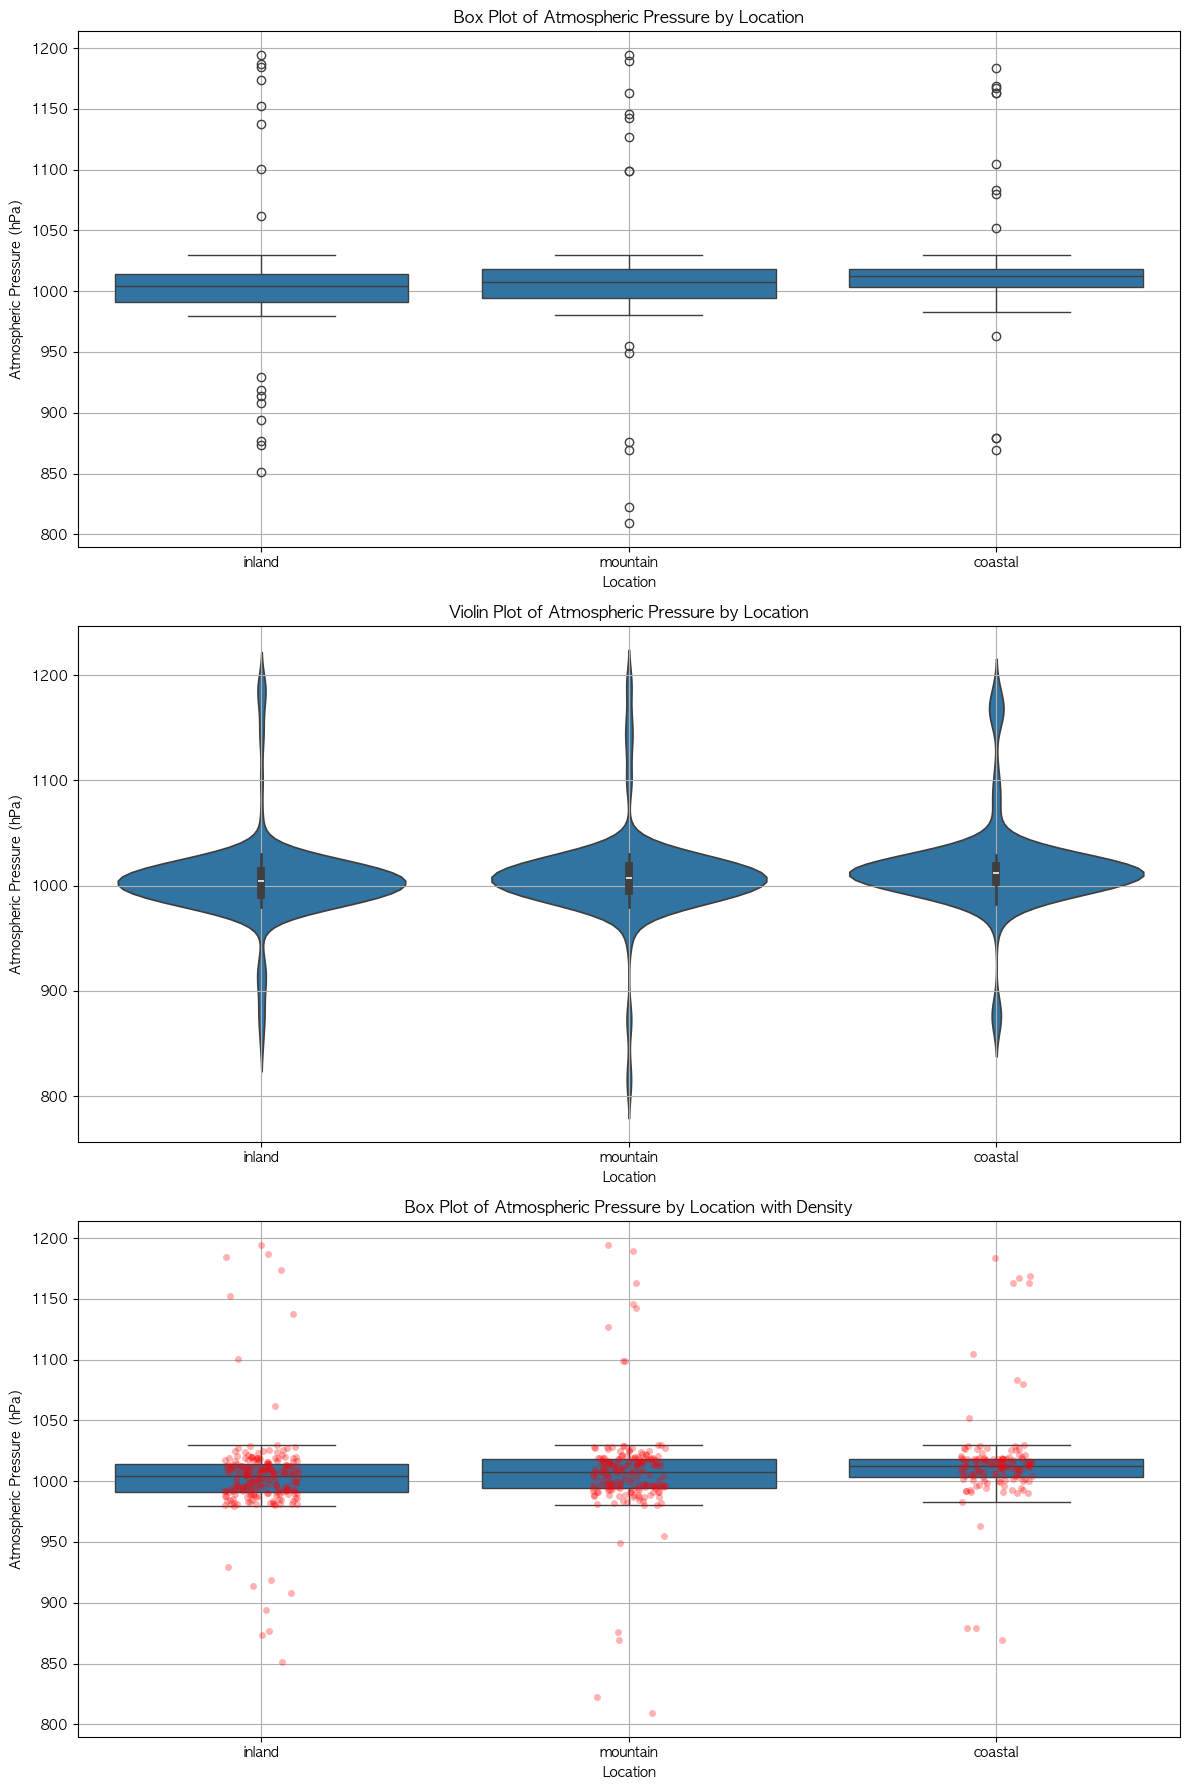

In [36]:
# 7. 여러 시각화 차트 합쳐보기

# 서브플롯 생성
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# 박스플롯 생성
sns.boxplot(ax=axes[0], x='Location', y='Atmospheric Pressure', data=df_sampled)
axes[0].set_title('Box Plot of Atmospheric Pressure by Location')
axes[0].set_xlabel('Location')
axes[0].set_ylabel('Atmospheric Pressure (hPa)')
axes[0].grid(True)

# 바이올린 플롯 생성
sns.violinplot(ax=axes[1], x='Location', y='Atmospheric Pressure', data=df_sampled)
axes[1].set_title('Violin Plot of Atmospheric Pressure by Location')
axes[1].set_xlabel('Location')
axes[1].set_ylabel('Atmospheric Pressure (hPa)')
axes[1].grid(True)

# 박스플롯과 점 밀도 표시
sns.boxplot(ax=axes[2], x='Location', y='Atmospheric Pressure', data=df_sampled, showfliers=False)
sns.stripplot(ax=axes[2], x='Location', y='Atmospheric Pressure', data=df_sampled, color='red', alpha=0.3, jitter=True)
axes[2].set_title('Box Plot of Atmospheric Pressure by Location with Density')
axes[2].set_xlabel('Location')
axes[2].set_ylabel('Atmospheric Pressure (hPa)')
axes[2].grid(True)

# 레이아웃 조정
plt.tight_layout()
plt.show()